## Setting things up

Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import gc
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [3]:
PATH = '../input/allstate-claims-severity/'

In [4]:
# Getting the file names
files = os.listdir(PATH)
files

['sample_submission.csv', 'train.csv', 'test.csv']

In [5]:
# Reading the csv files as Pandas DataFrame and store it separate variables 
variables = [x.replace('.csv', '') for x in files]

for v, f in zip(variables, files):
    exec("%s=pd.read_csv(PATH+f)" % v)

In [6]:
# Dropping Id column from train and test sets
tr, ts = train.drop(['id'], 1), test.drop(['id'], 1)

In [7]:
# Overview of Train set
tr.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
# Overview of Test set
ts.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


## Exploratory Data Analysis

Let us explore out data a bit. The more you understand the easier it gets while trying to fit a model on top of it.

In [9]:
# Checking shape
print(f'Shape of Train: {tr.shape}')
print(f'Shape of Test: {ts.shape}')

# Inference: 
# There are 131 columns in train and 130 in test

Shape of Train: (188318, 131)
Shape of Test: (125546, 130)


In [10]:
# Checking for missing values
print(f'No.of missing values in Train: {tr.isnull().sum().sum()}')
print(f'No.of missing values in Test: {ts.isnull().sum().sum()}')

# Inference: 
# There are no missing values in the dataset.

No.of missing values in Train: 0
No.of missing values in Test: 0


In [11]:
# Checking for different dtypes
pd.DataFrame({'Train': tr.dtypes.value_counts(), 'Test': ts.dtypes.value_counts()})

# Inference: 
# There are no problems with the datatypes between train and test sets.

,Train,Test
object,116,116
float64,15,14


In [12]:
# Understanding the categorical variables
categories = tr.describe(include='object')
categories

# Inference: 
# We understand the no.of distinct values in each categorical columns and the most frequent one

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


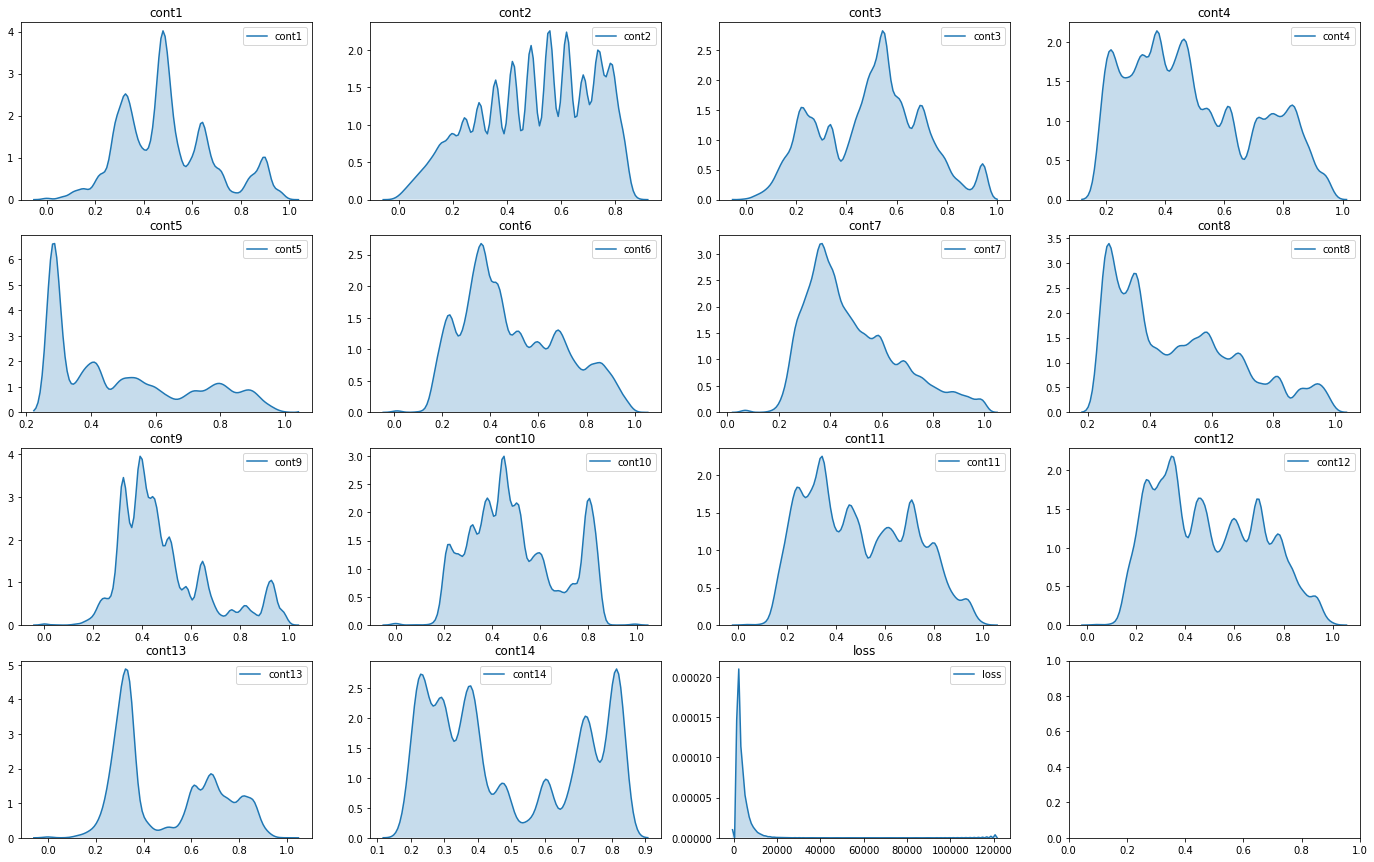

In [13]:
# Understanding the continuous variables
fig, axes = plt.subplots(4, 4, figsize=(24, 15))

for col, ax in zip(tr.select_dtypes(['float64']).columns, axes.flat):
    sns.kdeplot(tr[col], shade=True, ax=ax)
    ax.set_title(col)
plt.show()

# Inference: 
# We are having multi-modal distributions in some columns

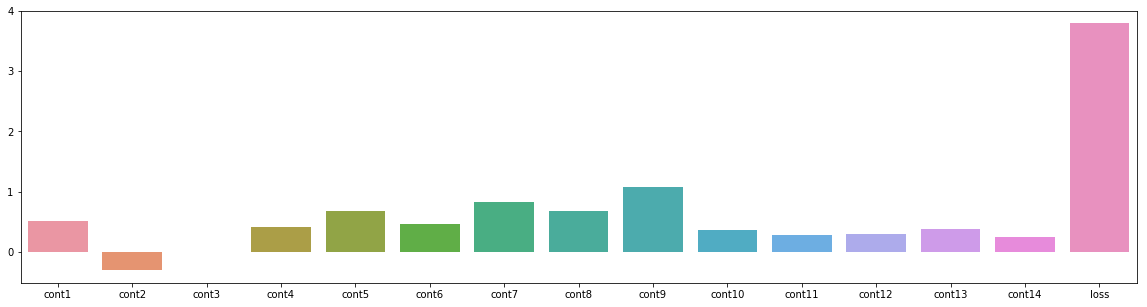

In [14]:
# Checking for skewness in the data
plt.figure(figsize=(20,5))
sns.barplot(tr.select_dtypes(['float64']).columns, tr.skew())

# Inference:
# No major skewness identified other than loss column

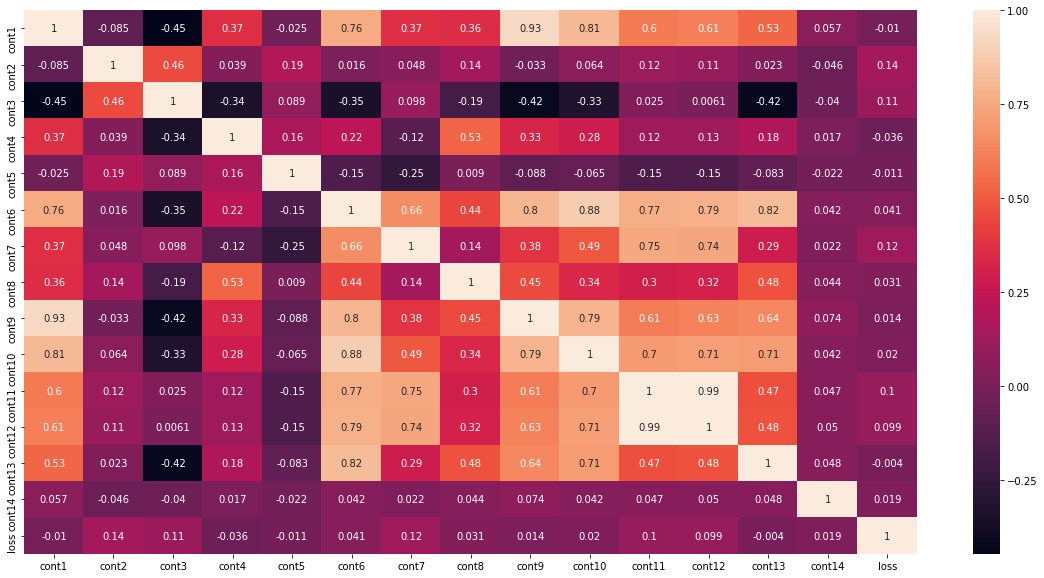

In [15]:
# Understanding the correlation.
plt.figure(figsize=(20, 10))
sns.heatmap(tr.corr(), annot=True)

# Inference: 
# There are certain independent variables correlated to other independent variables. These only adds bias to the model so we can remove them.
# No feature is highly correlated with the target

## Tranformation

We need to handle the skewness in our target. We can do that by taking log.

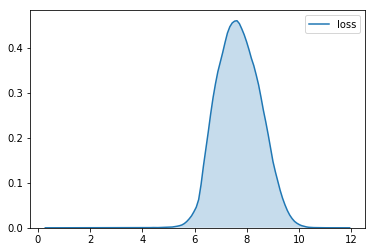

In [16]:
tr['loss'] = np.log1p(tr['loss'])
sns.kdeplot(tr['loss'], shade=True)

# Note:
# We use np.log1p returns all positive log distribution rather than np.log which returns negative values

## Data Preparation

There is one more step before creating the model. We need to handle the categorical values in the dataset. We can use pd.get_dummies() function for that. Also we will be splitting the dataset into train, validation and test sets.

In [17]:
SEED = 10

In [18]:
# # Shuffling the train set
# tr = tr.sample(random_state=SEED, frac=1)

# # Note: 
# # This shuffles the data. 
# # Shuffling is necessary so that after splitting the data into train, validation and test sets our model gets diverse amount of data to be trained on.

In [19]:
# Filtering categories having low percent of data distribution
# Length of the dataframe / (No.of unique values * Frequency)

dist_percent = np.divide(len(tr), np.multiply(categories.loc['unique'].values, categories.loc['freq'].values))
percentages = pd.DataFrame({'column': categories.columns, 'percent': dist_percent})
cat_cols = list(percentages[percentages['percent'] > 0.1]['column'].values)

print(f"Filtered categories: {len(cat_cols)}")

# Note:
# I am experimenting this technique and let us see if this works

Filtered categories: 110


In [20]:
# Filtering continuous variables with correlation greater than 0.75
corr = tr.drop('loss', 1).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop_num = [column for column in upper.columns if any(upper[column] > 0.6)]
num_cols = list(set(tr.drop('loss', 1).select_dtypes(['float64'])) - set(to_drop_num))

In [21]:
# Select only the filtered categories and continuous variables
final_tr = tr[cat_cols + num_cols + ['loss']]
final_ts = ts[cat_cols + num_cols]
final_tr.shape, final_ts.shape

((188318, 118), (125546, 117))

In [22]:
# Prearing features and target before encoding
features = final_tr.drop('loss', 1)
target = final_tr['loss']

In [23]:
# One-hot encode train data
features = pd.get_dummies(features, columns=features.select_dtypes('object').columns)
features.shape

(188318, 551)

In [24]:
# One-hot encode test data
payload = pd.get_dummies(final_ts, columns=final_ts.select_dtypes('object').columns)
payload.shape

(125546, 550)

In [25]:
# Handling missing columns in train and test sets
features, payload = features.align(payload, join='outer', axis=1, fill_value=0)
features.shape, payload.shape

((188318, 560), (125546, 560))

In [26]:
cols = features.columns

In [27]:
# # Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# features = sc.fit_transform(features)
# payload = sc.transform(payload)

### Splitting the data

In [28]:
SIZE = 0.2

In [29]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(features, target, random_state=SEED, test_size=SIZE)
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=SEED, test_size=SIZE)

## Modeling

We will create a base model to understand the feature importances.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, accuracy_score

In [31]:
eval_set  = [(x_val,y_val)]
model = CatBoostRegressor(random_state=SEED, 
                          n_estimators=6000,
                          max_depth=3, 
                          learning_rate=0.1, 
                          loss_function='MAE', 
                          eval_metric='MAE', 
                          reg_lambda=3, 
                          verbose=100)
%time model.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds=30)

0:	learn: 6.9211124	test: 6.9162611	best: 6.9162611 (0)	total: 108ms	remaining: 10m 47s
100:	learn: 0.4550415	test: 0.4581166	best: 0.4581166 (100)	total: 5.2s	remaining: 5m 3s
200:	learn: 0.4379026	test: 0.4419198	best: 0.4419198 (200)	total: 10.3s	remaining: 4m 56s
300:	learn: 0.4305221	test: 0.4353565	best: 0.4353565 (300)	total: 15.3s	remaining: 4m 49s
400:	learn: 0.4264297	test: 0.4317600	best: 0.4317600 (400)	total: 20.4s	remaining: 4m 44s
500:	learn: 0.4235775	test: 0.4292706	best: 0.4292706 (500)	total: 25.4s	remaining: 4m 38s
600:	learn: 0.4214441	test: 0.4277301	best: 0.4277301 (600)	total: 30.5s	remaining: 4m 33s
700:	learn: 0.4197234	test: 0.4264033	best: 0.4264033 (700)	total: 35.5s	remaining: 4m 28s
800:	learn: 0.4181943	test: 0.4254293	best: 0.4254293 (800)	total: 40.6s	remaining: 4m 23s
900:	learn: 0.4168587	test: 0.4245780	best: 0.4245713 (898)	total: 45.7s	remaining: 4m 18s
1000:	learn: 0.4156819	test: 0.4238572	best: 0.4238572 (1000)	total: 50.8s	remaining: 4m 13s
11

In [32]:
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

In [33]:
print(f"MAE Train: {mean_absolute_error(np.expm1(y_train_pred), np.expm1(y_train))}")
print(f"MAE Val: {mean_absolute_error(np.expm1(y_val_pred), np.expm1(y_val))}")
print(f"MAE Test: {mean_absolute_error(np.expm1(y_test_pred), np.expm1(y_test))}")

MAE Train: 1108.1662399519473
MAE Val: 1150.3823982394044
MAE Test: 1152.2882736937754


In [34]:
# importances = pd.DataFrame({'Feature': cols, 'Importance': np.round(model.feature_importances_, 4)}).sort_values('Importance', ascending=False)
# importances[importances['Importance'] > 0]

## Scoring

We can now apply the model to the test set (payload in our case) to get the outcomes. 

In [35]:
# Scoring
predictions = np.round(np.expm1(model.predict(payload)), 2)

submission = pd.DataFrame({'id': test['id'], 'loss': pd.Series(predictions)})
submission.to_csv('submission.csv', index=False)

# Note:
# We need to take the inverse for our predictions as it is the result of np.log1p(). We can do that using np.expm1() function

In [36]:
submission.head(10)

,id,loss
0,4,1374.45
1,6,1633.21
2,9,9615.14
3,12,6502.88
4,15,861.54
5,17,2394.96
6,21,2120.62
7,28,647.56
8,32,2325.04
9,43,3123.77
